# Final Assignment

## Question 1: 

A survey was conducted to gauge an audience interest in different data science topics, namely:

Big Data (Spark / Hadoop)
Data Analysis / Statistics
Data Journalism
Data Visualization
Deep Learning
Machine Learning
The participants had three options for each topic: Very Interested, Somewhat interested, and Not interested. 2,233 respondents completed the survey.

The survey results have been saved in a csv file and can be accessed through this link: https://cocl.us/datascience_survey_data.

If you examine the csv file, you will find that the first column represents the data science topics and the first row represents the choices for each topic.

Use the pandas read_csv method to read the csv file into a pandas dataframe, that looks like the following:

<img src = "https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/zZTfddhxEeisEhKURr0pTg_dd2d58abb47ce1fda0f1a1ccc29df9ca_Topic_Survey_Question.png?expiry=1602892800000&hmac=p8wKGdTL2PPcQtCXATPQraNxk_6gUlLJSW-h4d1qhLY" width = 400>

In order to read the data into a dataframe like the above, one way to do that is to use the index_col parameter in order to load the first column as the index of the dataframe. Here is the documentation on the pandas read_csv method: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [72]:
import pandas as pd 
import numpy as np

survey_df = pd.read_csv('../DATA/Topic_Survey_Assignment.csv', index_col=0)

survey_df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


## Question 2:

Use the artist layer of Matplotlib to replicate the bar chart below to visualize the percentage of the respondents' interest in the different data science topics surveyed.

<img src = "https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/_sOFz1VjEeiOFxKmNjWWlA_b6128d40f6727aefb40724091be686b7_Bar_Chart_Masked.png?expiry=1602892800000&hmac=IStLM2RLmiz6TFmn9l-azCewxWh2DSE7JCVlHdh9gf8" width = 400>

To create this bar chart, you can follow the following steps:

1. Sort the dataframe in descending order of Very interested.
2. Convert the numbers into percentages of the total number of respondents. Recall that 2,233 respondents completed the survey. Round percentages to 2 decimal places.
3. As for the chart:
    use a figure size of (20, 8),
    bar width of 0.8,
    use color #5cb85c for the Very interested bars, color #5bc0de for the Somewhat interested bars, and color #d9534f for the Not interested bars,
    use font size 14 for the bar labels, percentages, and legend,
    use font size 16 for the title, and,
    display the percentages above the bars as shown above, and remove the left, top, and right borders.


In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# this is how you ensure the columns are ordered as specified
survey_df = survey_df[['Very interested','Somewhat interested','Not interested']] 

totals = survey_df.sum(axis = 1, numeric_only = True)

totals

# add a row total to find the total answers
survey_df['Total'] = totals

# calculate the percentages
survey_df['Very interested'] = round((survey_df['Very interested']/survey_df['Total'])*100,2)

survey_df['Somewhat interested'] = round((survey_df['Somewhat interested']/survey_df['Total'])*100,2)

survey_df['Not interested'] = round((survey_df['Not interested']/survey_df['Total'])*100,2)

survey_df = survey_df.drop('Total',axis=1)

survey_df

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),60.88,33.32,5.80
Data Analysis / Statistics,77.00,20.26,2.74
Data Journalism,20.24,50.99,28.77
Data Visualization,61.58,33.73,4.69
Deep Learning,58.23,35.50,6.27
Machine Learning,74.73,21.88,3.39


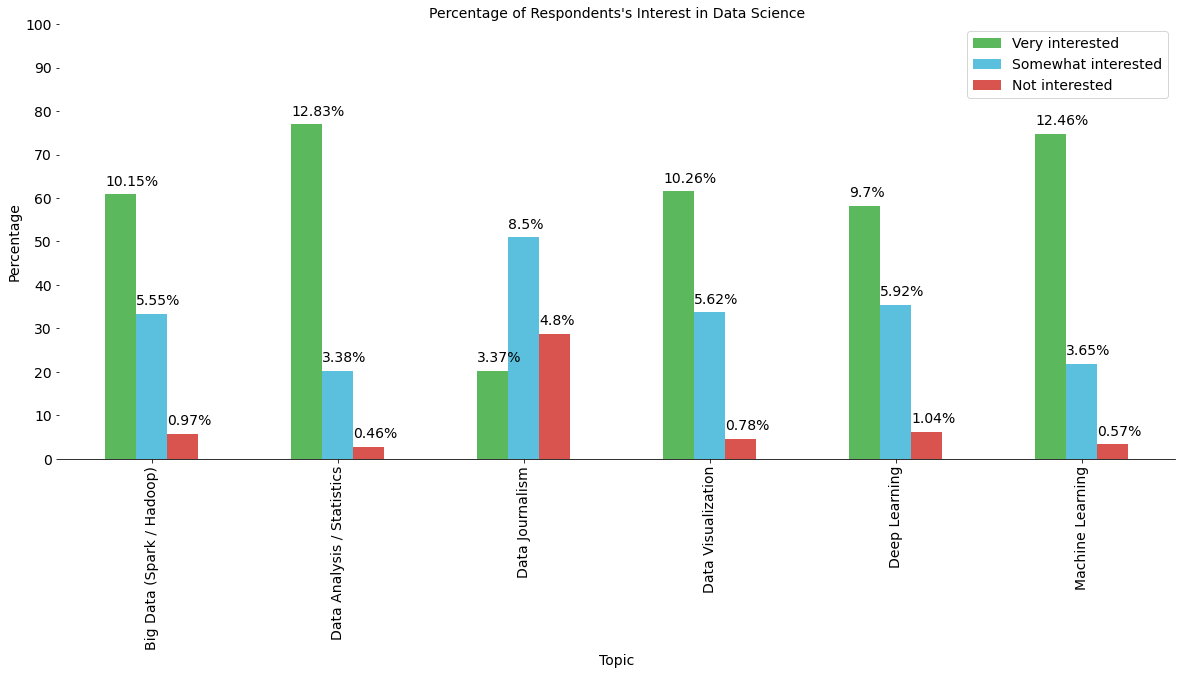

In [89]:
ax = survey_df.plot(kind='bar', figsize=(20,8),color=(['#5cb85c', '#5bc0de', '#d9534f']))

ax.set_title('Percentage of Respondents\'s Interest in Data Science', fontsize=14)
ax.set_xlabel("Topic",fontsize = 14)
ax.set_ylabel("Percentage",fontsize = 14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(np.arange(0,101,10),fontsize=14)
plt.legend(fontsize=14)

totals = []

for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+2, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14)



plt.show()

## Question 3:

In the final lab, we created a map with markers to explore crime rate in San Francisco, California. In this question, you are required to create a Choropleth map to visualize crime in San Francisco.

Before you are ready to start building the map, let's restructure the data so that it is in the right format for the Choropleth map. Essentially, you will need to create a dataframe that lists each neighborhood in San Francisco along with the corresponding total number of crimes.

Based on the San Francisco crime dataset, you will find that San Francisco consists of 10 main neighborhoods, namely:

Central,

Southern,

Bayview,

Mission,

Park,

Richmond,

Ingleside,

Taraval,

Northern, and

Tenderloin.

Convert the San Francisco dataset, which you can also find here, https://cocl.us/sanfran_crime_dataset, into a pandas dataframe, like the one shown below, that represents the total number of crimes in each neighborhood.

<img src = "https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/UcAIVlVkEeiDhgqYR-Lxvg_94c477dfeb3935cccb0b468f5c9ba46b_crime_dataset_masked.png?expiry=1602892800000&hmac=_kcJ90ULvicI-QgnRyddsrZ7WxvJohzbcJqT8y1-gDI" width = 400>


In [92]:
crime_df = pd.read_csv('../DATA/sanfran_crime.csv')

# Assigning a variable with the total counts of each Neighborhood
df_neig= crime_df['PdDistrict'].value_counts()

# Assigning the values of the variable to a Pandas Data frame
df_neig1 = pd.DataFrame(data=df_neig.values, index = df_neig.index, columns=['Count'])

# Reindexing the data frame to the requirement
df_neig1 = df_neig1.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

# Resetting the index
df_neig1 = df_neig1.reset_index()

# Assignming the column names
df_neig1.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

# View the data frame
df_neig1


,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


As you learned in the Choropleth maps lab, you will need a GeoJSON file that marks the boundaries of the different neighborhoods in San Francisco. In order to save you the hassle of looking for the right file, I already downloaded it for you and I am making it available via this link: https://cocl.us/sanfran_geojson.

For the map, make sure that:

it is centred around San Francisco,
you use a zoom level of 12,
you use fill_color = 'YlOrRd',
you define fill_opacity = 0.7,
you define line_opacity=0.2, and,
you define a legend and use the default threshold scale.
If you follow the lab on Choropleth maps and use the GeoJSON correctly, you should be able to generate the following map:

<img src = "https://d3c33hcgiwev3.cloudfront.net/imageAssetProxy.v1/okW9uVVkEeiDhgqYR-Lxvg_9e78dcfa79cdc9d18d31ac51173865db_sanfran_map_masked.png?expiry=1602892800000&hmac=2IYICVNt81BgsTyjYD9CjgOtgm0vOjm460vno5nufPw" width = 400>


In [108]:
# Load the packages for creating the Choropleth map
import folium

# Read in the GeoJSON file
geojson = r'../DATA/sanfran_geojson'

# Create the map centering San Fransico
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)

# Display the map
sf_map.choropleth(geo_data=geojson,
                  data=df_neig1,
                  columns=['Neighborhood', 'Count'],
                  key_on='feature.properties.DISTRICT',
                  fill_color='YlOrRd', 
                  fill_opacity=0.7, 
                  line_opacity=0.2,
                  legend_name='Crime Rate in San Francisco'
)

sf_map

ModuleNotFoundError: No module named 'folium'